# Voting Systems (part 2)

We are now going to consider a different adversary. And the we are gonna do that is through $g$ vulnerability.

Suppose that the adversary will benefit from guessing correctly how some elector voted, but their benefit does not depend on which elector they choose or who the elector voted for: any victim, and any vote will be a gain for them. We define for that a gain function $g_1$ which allows an adversary to choose from action set $C×E$, where $(c, e)$ is their action of guessing that candidate $c$ was selected by elector $e$.

$g_1$ can be defined as:

$$
g_1((c,e),z) =
\left\{
	\begin{array}{ll}
		1  & \texttt{if } c = z(e) \\
		0 & \texttt{if } c \neq z(e)
	\end{array}
\right.
$$

where $z(e)$ is the candidate voted for by elector $e$ in voting pattern $z$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from func import *
try:
    from qif import *
except: # install qif if not available (for running in colab, etc)
    import IPython; IPython.get_ipython().run_line_magic('pip', 'install qif')
    from qif import *

In [2]:
def g1(vote, voting_combination, num_voters, num_candidates):
    return int(vote[0] == get_votes(voting_combination, num_voters, num_candidates)[vote[1]])

If we construct $G_1$ with the possible actions as rows and the possible values of $X$ as columns we get:

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
G_1 & c_1 c_1 c_1 & c_1 c_1 c_2 & c_1 c_2 c_1 & c_1 c_2 c_2 & c_2 c_1 c_1 & c_2 c_1 c_2 & c_2 c_2 c_1 & c_2 c_2 c_2 \\ \hline
(c_1, e_1) & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\ \hline
(c_1, e_2) & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\ \hline
(c_1, e_3) & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\ \hline
(c_2, e_1) & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 \\ \hline
(c_2, e_2) & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 \\ \hline
(c_2, e_3) & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\ \hline
\end{array}
$$

In [3]:
def get_G1(num_voters, num_candidates):
    return np.array([[g1((c, v), i, num_voters, num_candidates) for i in range(num_candidates ** num_voters)] for c,v in itertools.product(range(num_candidates), range(num_voters))])

In [4]:
num_voters = 3
num_candidates = 2
num_combinations = num_candidates ** num_voters

In [5]:
G1 = get_G1(num_voters, num_candidates)
print(G1)

[[1 1 1 1 0 0 0 0]
 [1 1 0 0 1 1 0 0]
 [1 0 1 0 1 0 1 0]
 [0 0 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1]
 [0 1 0 1 0 1 0 1]]


The following matrix shows for each action, the expected gain (rows are actions, columns are election results). 

In [6]:
W = get_W(num_voters, num_candidates)
pi = probab.uniform(num_combinations)

In [7]:
print(G1.dot(channel.hyper(W, pi)[1]))

[[0.75 0.25]
 [0.75 0.25]
 [0.75 0.25]
 [0.25 0.75]
 [0.25 0.75]
 [0.25 0.75]]


For each possible outcome, the adversary's best action succeeds with probability of $0.75$. So it is natural to expecet that their average chance of success is again $0.75$. Remember that adversary $g_1$ tries to guess the vote of any voter. And the posterior $g$ vulnerability expresses his chance of succeeding in that.

In [8]:
print("Prior g vulnerability:", measure.g_vuln.prior(G1, pi))
print("Posterior g vulnerability:", measure.g_vuln.posterior(G1, pi, W))
print("Multiplicative g leakage:", measure.g_vuln.mult_leakage(G1, pi, W))

Prior g vulnerability: 0.5
Posterior g vulnerability: 0.75
Multiplicative g leakage: 1.5


We see that before observing the election results, an adversary had an average chance of success equal to $0.5$. But after the results are announced, they can imporve their guess by $50\%$. And to make that guess they use the following reasoning:

> _If candidate $c_1$ wins then the adversary always guesses $(c_1, e)$ for any elector $e$, and if $c_2$ wins then the adversary always guesses $(c_2, e)$. That is because in the post-hoc situation the winner is the candidate that is most likely to have been selected by most electors._

If we experiment with a slightly bigger amount of voters, for example 9, we get the following results.

>_Note that if you experiment with an even number of voters, ties between the candidates may appear, and will cause small imbalances in some of the probabilities above._

In [9]:
num_voters = 9
num_candidates = 2
num_combinations = num_candidates ** num_voters

In [10]:
G1 = get_G1(num_voters, num_candidates)

In [11]:
W = get_W(num_voters, num_candidates)
pi = probab.uniform(num_combinations)

In [12]:
print(G1.dot(channel.hyper(W, pi)[1]))

[[0.63671875 0.36328125]
 [0.63671875 0.36328125]
 [0.63671875 0.36328125]
 [0.63671875 0.36328125]
 [0.63671875 0.36328125]
 [0.63671875 0.36328125]
 [0.63671875 0.36328125]
 [0.63671875 0.36328125]
 [0.63671875 0.36328125]
 [0.36328125 0.63671875]
 [0.36328125 0.63671875]
 [0.36328125 0.63671875]
 [0.36328125 0.63671875]
 [0.36328125 0.63671875]
 [0.36328125 0.63671875]
 [0.36328125 0.63671875]
 [0.36328125 0.63671875]
 [0.36328125 0.63671875]]


For each possible outcome, the adversary's best action succeeds with probability of $0.63$. Which again, is equal to the channel's $g$ vulnerability.

In [13]:
print("Prior g vulnerability:", measure.g_vuln.prior(G1, pi))
print("Posterior g vulnerability:", measure.g_vuln.posterior(G1, pi, W))
print("Multiplicative g leakage:", measure.g_vuln.mult_leakage(G1, pi, W))

Prior g vulnerability: 0.5
Posterior g vulnerability: 0.63671875
Multiplicative g leakage: 1.2734375


If we make a plot for up to 15 voters we see that the $g$ vulnerability gets smaller as the number of voters increases, while the prior $g$ vulnerability stays the same.

> _Note that as the number of voters increases, the possible values of $X$ (i.e. number of possible voting combinations) increases exponentially and it becomes computationally expensive to compute the posterior vulnerability or any other measure._

In [14]:
c = 2 # number of candidates
vs = [v for v in range(1, 15)]

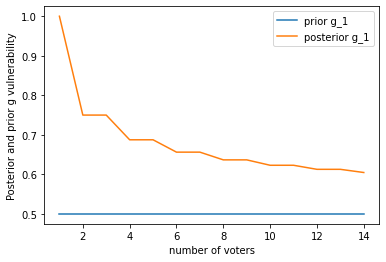

In [15]:
plt.plot(vs, [measure.g_vuln.prior(get_G1(v, c), probab.uniform(c ** v)) for v in vs], label="prior g_1")
plt.plot(vs, [measure.g_vuln.posterior(get_G1(v, c), probab.uniform(c ** v), get_W(v, c)) for v in vs], label="posterior g_1")
plt.xlabel('number of voters')
plt.ylabel('Posterior and prior g vulnerability')
plt.legend()
None

So it is natural to expect that the $g$ multiplicative leakage will also be decreasing.

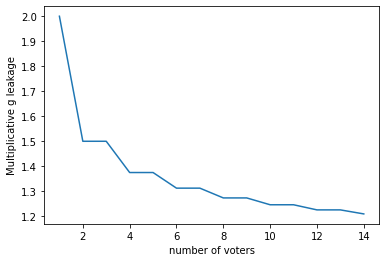

In [16]:
plt.plot(vs, [measure.g_vuln.mult_leakage(get_G1(v, c), probab.uniform(c ** v), get_W(v, c)) for v in vs])
plt.xlabel('number of voters')
plt.ylabel('Multiplicative g leakage')
None